[[ 0.  0.  1.  1.]
 [ 0.  1.  1.  1.]
 [ 0.  2.  1.  1.]
 ...
 [50. 48.  1.  1.]
 [50. 49.  1.  1.]
 [50. 50.  1.  1.]]
MULTIPOLYGON (((5 1, 4 1, 3 1, 2 1, 1 1, 1 2, 1 3, 2 3, 3 3, 4 3, 5 3, 6 3, 7 3, 8 3, 9 3, 10 3, 11 3, 12 3, 13 3, 14 3, 15 3, 15 4, 15 5, 15 6, 15 7, 15 8, 15 9, 15 10, 16 10, 17 10, 17 11, 17 12, 17 13, 17 14, 17 15, 17 16, 18 16, 19 16, 20 16, 20 17, 20 18, 20 19, 20 20, 20 21, 20 22, 21 22, 22 22, 22 21, 22 20, 22 19, 22 18, 22 17, 22 16, 22 15, 22 14, 22 13, 22 12, 21 12, 20 12, 19 12, 18 12, 18 11, 18 10, 18 9, 18 8, 18 7, 18 6, 18 5, 19 5, 20 5, 21 5, 22 5, 22 4, 22 3, 22 2, 22 1, 21 1, 20 1, 19 1, 18 1, 17 1, 16 1, 15 1, 14 1, 13 1, 12 1, 11 1, 10 1, 9 1, 8 1, 7 1, 6 1, 5 1)), ((7 19, 7 20, 7 21, 8 21, 8 22, 9 22, 10 22, 11 22, 12 22, 13 22, 13 21, 13 20, 13 19, 13 18, 13 17, 12 17, 11 17, 10 17, 9 17, 8 17, 7 17, 7 18, 7 19)), ((0 50, 0.99 50, 0.99 1, 0 1, 0 50)), ((8 32, 9 32, 10 32, 10 33, 10 34, 10 35, 10 36, 11 36, 11 35, 11 34, 11 33, 11 32, 11 31, 11 30

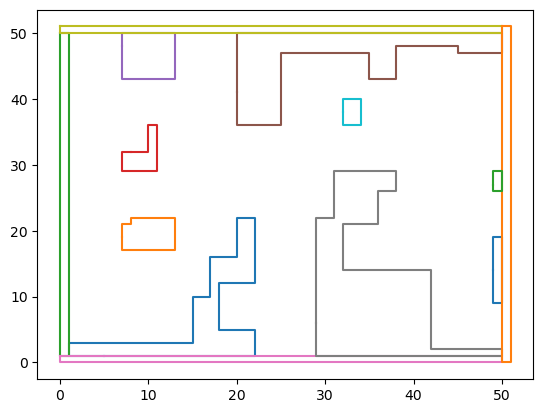

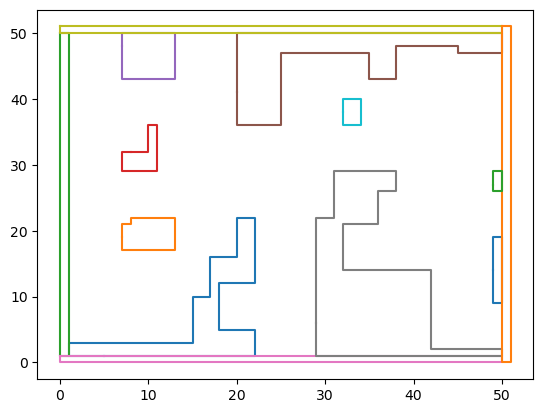

In [3]:
import numpy as np
import shapely
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import mapping
from shapely.geometry import shape

# from geometry_msgs.msg import Polygon
# from geometry_msgs.msg import Point
# from geometry_msgs.msg import Point32




def rectangle_to_polygon(rect):
    poly = np.zeros((5,2))
    poly[0,0] = rect[0]
    poly[0,1] = rect[1]
    
    poly[1,0] = rect[0]
    poly[1,1] = rect[1]+rect[3]
    
    poly[2,0] = rect[0]+rect[2]
    poly[2,1] = rect[1]+rect[3]
    
    poly[3,0] = rect[0]+rect[2]
    poly[3,1] = rect[1]
    
    poly[4,0] = rect[0]
    poly[4,1] = rect[1]
    
    return shapely.polygons(poly)

def save_polygon(polygons):
    # save the polygons to the .shp file
    schema = {
        'geometry': 'Polygon',
        'properties': {'id': 'int'},
    }
    with fiona.open('extended_polygon.shp','w','ESRI Shapefile',schema) as c:
        id = 0
        for p_fuse_i in polygons:
            x,y = p_fuse_i.exterior.xy
            # write the extended polygon to .shp file 
            c.write({
                'geometry': mapping(p_fuse_i),
                'properties':{'id':id},
            })
            id +=1

def get_global_map():

    global_map_list = []
    schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
    }

    with fiona.open("extended_polygon.shp") as shapefile:
        for record in shapefile:
            geometry = shape(record['geometry'])

            # if shapely.contains(geometry,shapely.Point(-28,-58)):
            #     continue
            global_map_list.append(geometry)
            # x5,y5 = geometry.exterior.xy
            # xi2,yi2 = geometry.interiors[0].xy
        map_shapely = shapely.unary_union(global_map_list)

        # print(type(map_shapely))
        
    
    # map_polygon = shapely.Polygon()
    return map_shapely


def test():
    rects = np.loadtxt('obstacle.csv',delimiter=',')
    print(rects)
    polygons = []
    for rect in rects:
        if rect[0]>0 and rect[1]>0 and rect[0]<50 and rect[1]<50:        
            polygons.append(rectangle_to_polygon(rect=rect))
    
    polygons.append(shapely.Polygon(((0,0),(0,0.99),(50,0.99),(50,0),(0,0))))
    polygons.append(shapely.Polygon(((0,1),(0,50),(0.99,50),(0.99,1),(0,1))))
    polygons.append(shapely.Polygon(((0,50.01),(0,51),(50,51),(50,50.01),(0,50.01))))
    polygons.append(shapely.Polygon(((50.01,0),(50.01,51),(51,51),(51,0),(50.01,0))))

    # save to the file
    save_polygon(polygons=polygons)
        
    multipolygon = shapely.unary_union(polygons)
    print(multipolygon)
    
    for poly in multipolygon.geoms:
        x,y = poly.exterior.xy
        plt.plot(x,y)
    plt.show()
    
if __name__ =='__main__':
    test()
    global_map = get_global_map()
    for n in global_map.geoms:
        x,y = n.exterior.xy
        plt.plot(x,y)